In [1]:
# import packages
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
from spisea.imf import imf, multiplicity
import numpy as np
import pylab as py
import pdb
import matplotlib.pyplot as plt

/home/wyz5rge/.local/lib/python3.9/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /scratch/wyz5rge/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


In [2]:
# Creat isochrone
logAge = np.log10(1*10**6.) # Age in log(years)
AKs = 3 # extinction in mags
dist = 4500 # distance in parsec
metallicity = 0 # Metallicity in [M/H]

# Evolution/atmosphere models and extinction law
evo_model = evolution.MISTv1() 
atm_func = atmospheres.get_merged_atmosphere
red_law = reddening.RedLawHosek18b()

# Specify filters for synthetic photometry
filt_list = ['jwst,F162M', 'jwst,F200W']
# print(synthetic.get_obs_str(filt_list[0]))

# Specify the directory we want the output isochrone
# table saved in. If the directory does not already exist,
# SPISEA will create it.
iso_dir = 'isochrones/'

# Make IsochronePhot object
my_iso = synthetic.IsochronePhot(logAge, AKs, dist, metallicity=0,
                            evo_model=evo_model, atm_func=atm_func,
                            red_law=red_law, filters=filt_list,
                                iso_dir=iso_dir)

Changing to logg=4.50 for T= 39023 logg=4.15
Changing to logg=4.50 for T= 39414 logg=4.14
Changing to logg=4.50 for T= 40077 logg=4.14
Changing to logg=4.50 for T= 40481 logg=4.13
Changing to logg=4.50 for T= 41038 logg=4.13
Changing to logg=4.50 for T= 41391 logg=4.13
Changing to logg=4.50 for T= 41709 logg=4.12
Changing to logg=4.50 for T= 42053 logg=4.12
Changing to logg=4.50 for T= 42409 logg=4.12
Changing to logg=4.50 for T= 42725 logg=4.12
Changing to logg=4.50 for T= 43048 logg=4.11
Changing to logg=4.50 for T= 43380 logg=4.11
Changing to logg=4.50 for T= 43755 logg=4.11
Changing to logg=4.50 for T= 44345 logg=4.10
Changing to logg=4.50 for T= 44940 logg=4.10
Changing to logg=4.50 for T= 45533 logg=4.09
Changing to logg=4.50 for T= 46164 logg=4.09
Changing to logg=4.50 for T= 47104 logg=4.09
Changing to logg=4.50 for T= 47885 logg=4.08
Changing to logg=4.50 for T= 48285 logg=4.08
Changing to T= 50000 for T= 50969 logg=4.10
Changing to logg=5.00 for T= 50969 logg=4.10
Changing to

In [3]:
# Print isochrone stars, metadata
print(my_iso.points)
print(my_iso.points.meta)
print('The columns in the isochrone table are: {0}'.format(my_iso.points.keys()))

          L                   Teff                R                  mass               logg         isWR     mass_current    phase    m_jwst_F162M       m_jwst_F200W   
          W                    K                  m                solMass                                      solMass                                                  
---------------------- ------------------ ------------------ ------------------- ------------------ ----- ------------------- ----- ------------------ ------------------
  2.72198457814469e+25  2979.853632685041  696052767.9000933  0.1040143161644397   3.45179542990774 False 0.10401426797965442  -1.0 23.546627087396125 21.744849837660347
2.8628928516759996e+25 2988.6158081547865   709662028.256756 0.10744724963156292 3.4470668107938147 False 0.10744719898332065  -1.0 23.490068256620486 21.689854072480227
                   ...                ...                ...                 ...                ...   ...                 ...   ...                ...

In [4]:
# Identify a 1 M_sun star, print F162M, F200W mags
idx = np.where( abs(my_iso.points['mass'] - 1.0) == min(abs(my_iso.points['mass'] - 1.0)) )[0]
f162m = np.round(my_iso.points[idx[0]]['m_jwst_F162M'], decimals=3)
f200w = np.round(my_iso.points[idx[0]]['m_jwst_F200W'], decimals=3)
print('1 M_sun: F162M = {0} mag, F200W = {1} mag'.format(f162m, f200w,))

1 M_sun: F162M = 20.485 mag, F200W = 18.591 mag


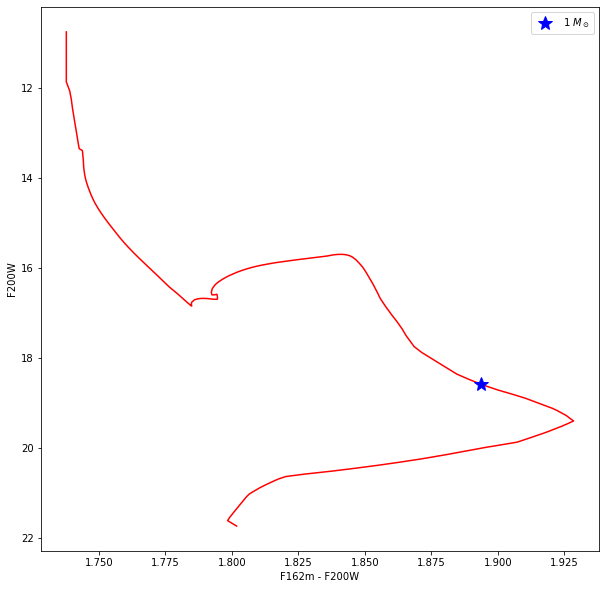

In [5]:
# Plot CMD
py.figure(1, figsize=(10,10))
py.clf()
py.plot(my_iso.points['m_jwst_F162M'] - my_iso.points['m_jwst_F200W'], 
       my_iso.points['m_jwst_F200W'], 'r-', label='_nolegend_')
py.plot(my_iso.points['m_jwst_F162M'][idx] - my_iso.points['m_jwst_F200W'][idx], 
       my_iso.points['m_jwst_F200W'][idx], 'b*', ms=15, label='1 $M_\odot$')
py.xlabel('F162m - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()
py.legend()

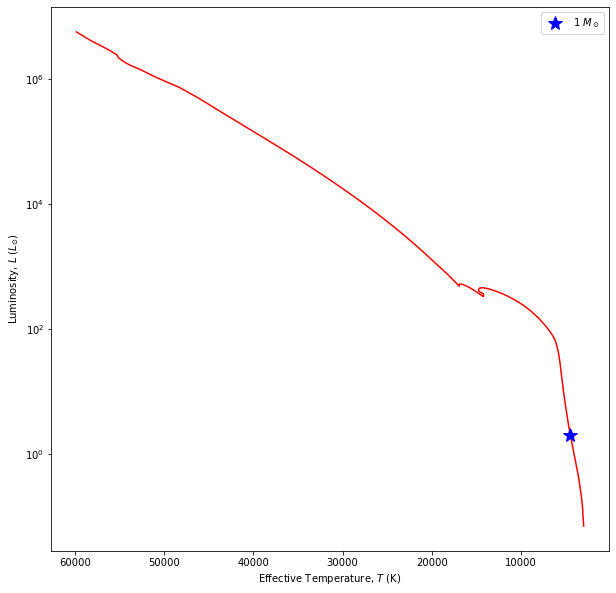

In [6]:
# Plot HR

watts_to_lsun = 1.0 / (3.846e26) # conversion factor for watts to Lsun
data_iso_Lsun = my_iso.points['L'] * watts_to_lsun

py.figure(1, figsize=(10,10))
py.clf()
py.plot(my_iso.points['Teff'], data_iso_Lsun, 'r-', label='_nolegend_')
py.plot(my_iso.points['Teff'][idx], data_iso_Lsun[idx], 'b*', ms=15, label='1 $M_\odot$')
py.yscale('log')
py.xlabel('Effective Temperature, $T$ (K)')
py.ylabel('Luminosity, $L$ ($L_{\odot}$)')
py.gca().invert_xaxis()
py.legend()

In [7]:
imf_multi = multiplicity.MultiplicityUnresolved()
massLimits = np.array([0.2, 0.5, 1, 120])
powers = np.array([-1.3, -2.3, -2.3])
my_imf = imf.IMF_broken_powerlaw(massLimits, powers, imf_multi)

In [8]:
# Define total cluster mass, create cluster
mass = 10**5.
cluster = synthetic.ResolvedCluster(my_iso, my_imf, mass)
print('The cluster table contains these columns: {0}'.format(cluster.star_systems.keys()))

The cluster table contains these columns: ['mass', 'isMultiple', 'systemMass', 'Teff', 'L', 'logg', 'isWR', 'mass_current', 'phase', 'metallicity', 'm_jwst_F162M', 'm_jwst_F200W', 'N_companions']


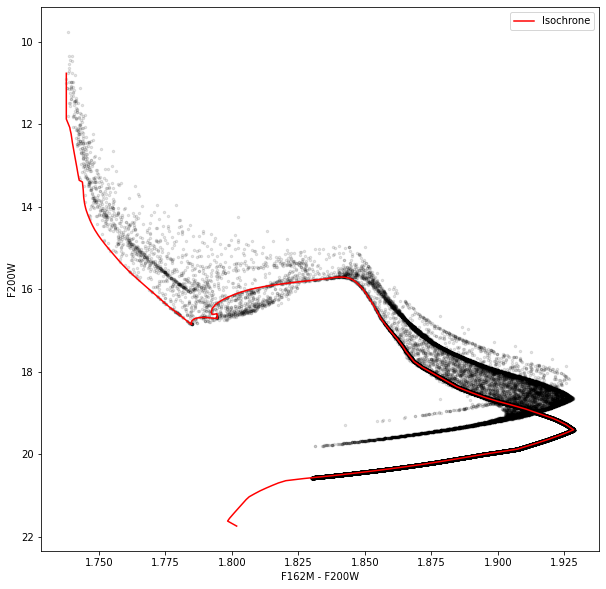

In [9]:
# Generate cluster CMD
clust = cluster.star_systems
iso = my_iso.points

py.figure(2, figsize=(10,10))
py.clf()
py.plot(clust['m_jwst_F162M'] - clust['m_jwst_F200W'], clust['m_jwst_F200W'],
       'k.', ms=5, alpha=0.1, label='__nolegend__')
py.plot(iso['m_jwst_F162M'] - iso['m_jwst_F200W'], iso['m_jwst_F200W'],
       'r-', label='Isochrone')
py.xlabel('F162M - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()
py.legend()

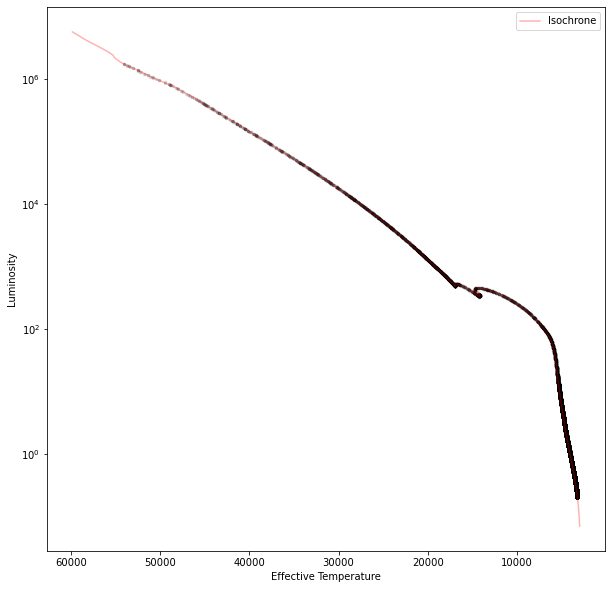

In [10]:
# Generate cluster HR
data_cluster_Lsun = clust['L'] * watts_to_lsun

py.figure(2, figsize=(10,10))
py.clf()
py.plot(clust['Teff'], data_cluster_Lsun, 'k.', ms=5, alpha=0.1, label='__nolegend__')
py.plot(iso['Teff'], data_iso_Lsun, 'r-', alpha=0.3, label='Isochrone')
py.yscale('log')
py.xlabel('Effective Temperature')
py.ylabel('Luminosity')
py.gca().invert_xaxis()
py.legend()